The polynomial that results from maximizing the likelihood should be the same as a polynomial from a least squares fit,if we assume a normal(Gaussian) distribution and the data is independent and identically distributed.We will compare it to validate our algorithm.  

how to understand MLE?  Watch [this video](https://www.youtube.com/watch?v=5NMxiOGL39M) and begin in 14 minute

In [22]:
#generate sample data
import numpy as np
import math


x=np.linspace(0.0,10,num=100)
trueValue=[0.0,3.5,4.4]
a,b,c=tuple(trueValue)

y=c*(x**2)+b*x+a

#add normal noise to the data
noise=np.random.normal(0,10.,100)
y=y+noise


#save the data as a np array
np.save('data/myData',[x,y])

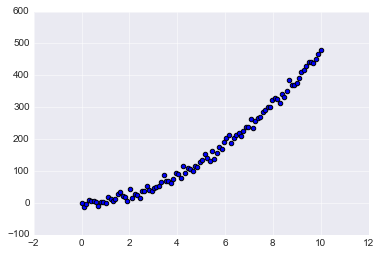

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-darkgrid')
plt.scatter(x,y)

Now onto the formulation of the likelihood equation that we will use to determine coefficients of a fitted polynomial.  

Linear regression is generally of some form  
$$Y=X\beta +r$$ 

For a seconde order polynomial,X is of the form $X=[1,x,x^2]$.We can rewrite the equation of linear regression as
$$ r=Y-X\beta$$
where the resuals r are ecpressed as teh difference batween the true model(Y) and the linear model($X\beta$).If we assume the data to be of an independent and identically distributed sample,and that the residual r is from a normal(Gaussian) distribution,then we will get the following probability density funcion $f$.
$$
f(x|\mu , \sigma^2) = (2 \pi \sigma^2)^{-\frac{n}{2}} \text{exp}(- \frac{(x-\mu)^2}{2\sigma^2})
$$

The probability density function $f(x | \mu,\sigma^2)$ is for a point $x$,with a mean $\mu$, and standard deviation $\sigma$.If we substitute the residual into the equation,and assume that the residual will have a mean of zero$(\mu=0)$ we get
$$
f(r|0 , \sigma^2) = (2 \pi \sigma^2)^{-\frac{n}{2}} \text{exp}(- \frac{(y - x\beta)^2}{2\sigma^2})
$$

which defines the probability density function for a given point.The likelihood $L$ is defined as 
$$
L(\beta | x_1, x_2, \cdots, x_n) = \prod_{i=1}^{n}f(x_i | \beta)
$$

the multiplication of all probability densities at each $x_i$ point.When we substitute the probability density function into the definition of the maximum likelihood function,we have the following.
$$
L(\beta | x_1, x_2, \cdots, x_n) = (2 \pi \sigma^2)^{\frac{n}{2}} \text{exp}(- \frac{(\mathbf{Y} - \mathbf{X}\mathbf{\beta})^{\text{T}}(\mathbf{Y} - \mathbf{X}\mathbf{\beta} ) }{2\sigma^2})
$$

It is practical to work with the log-likelihood as opposed to the likelihood equation as the likelihood equation can be nearly zero.

In [24]:
#define a function to calculate the log likelihood
def calLogLikelihood(guess,true,n):
    error=true-guess
    sigma=np.std(error)
    f=((1.0/(2.0*math.pi*sigma*sigma))**(n/2))* \
        np.exp(-1*(np.dot(error,error))/(2*sigma*sigma))
    return np.log(f)

Optimization is used to determine which paramters $\beta$ maximize the log-likelihood function.The optimization problem is expressed below.
$$
\{ \hat {\beta}_{MLE} \} \subseteq \{\text{arg max} \ln \bigg ( L(\beta | x_1,x_2,\cdots,x_n) \bigg ) \}
$$

So since our data originates from a second order polynomial,let's fit a second order polynomial to the data.First we will have to define a funciton which will calculate the log likelihood value of the second order polynomial for three different coefficients ('var').

In [25]:
#define the function which will return the objective function to be minimized
def myFunction(var):
    [x,y]=np.load('data/myData.npy')
    yGuess=(var[2]*(x**2))+(var[1]*x)+var[0]
    f=calLogLikelihood(yGuess,y,float(len(yGuess)))
    return (-1*f)

We can then ues gradient-based optimization to find which polynomial coefficients maximize the log-likelihood.

In [26]:
nvar=3
var=np.zeros(nvar)   #pick some random starting points for the optimization,here we choose three 0s
var[0]=-15.0
var[1]=4.0
var[2]=0.0
from scipy.optimize import minimize
res=minimize(myFunction,var,method='BFGS',options={'disp':True})

Optimization terminated successfully.
         Current function value: 369.055171
         Iterations: 13
         Function evaluations: 130
         Gradient evaluations: 26


In [27]:
print res

      fun: 369.0551714453393
 hess_inv: array([[ 8.76853425, -3.422308  ,  0.28158815],
       [-3.422308  ,  1.77523901, -0.16499241],
       [ 0.28158815, -0.16499241,  0.016419  ]])
      jac: array([  0.00000000e+00,   0.00000000e+00,   3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 130
      nit: 13
     njev: 26
   status: 0
  success: True
        x: array([-3.47822001,  5.24373436,  4.27130965])


As it turns out ,with the assumptions we have made(Guassian distribution,independent and identically distributed,$\mu$=0) the result of maximizing the likelihood should be the same as performing a least squares fit.So let's go ahead and perform a least squares fit to determine the coefficients fo a second order polynomial from data points.This can be done with scikit-learn easily with the following lines of Python code.

In [28]:
#perform least squares fit using sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

model=Pipeline([('poly',PolynomialFeatures(degree=2)), \
               ('linear',LinearRegression(fit_intercept=False))])

model=model.fit(x[:,np.newaxis],y)
coefs=model.named_steps['linear'].coef_

In [29]:
coefs

array([-3.47821169,  5.24372933,  4.27131014])

compare the two results

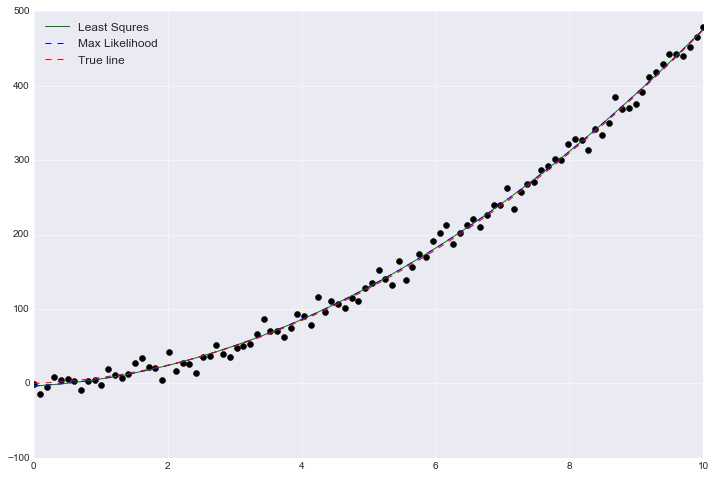

In [30]:
# plot the data and model fits
plt.figure(figsize=(12,8))
plt.plot(x,y, 'ok')
plt.plot(x,model.predict(x[:,np.newaxis]), '-g', label='Least Squres')
plt.plot(x,(res.x[2]*(x**2)) + (res.x[1]*x) + res.x[0], '--b', label='Max Likelihood')
plt.plot(x,(c*x**2)+b*x+a,'--r',label='True line')
plt.grid(True)
plt.legend(loc=2)
plt.show()
# plt.savefig('maxLikelihoodComp.png', dpi=300, type='png')

In [31]:
print 'true value:',trueValue
print 'max likelihood:',res.x
print 'least square:',coefs

true value: [0.0, 3.5, 4.4]
max likelihood: [-3.47822001  5.24373436  4.27130965]
least square: [-3.47821169  5.24372933  4.27131014]
